In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=77c2ac9c45c4f840a6eb7ff1607d31c4c1991b05cfa1809c7118190761a055b8
  Stored in directory: c:\users\mail2\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [152]:
groc_st = pd.read_csv('../data/Groceries_dataset.csv')

In [153]:
groc_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Text(0, 0.5, 'Count')

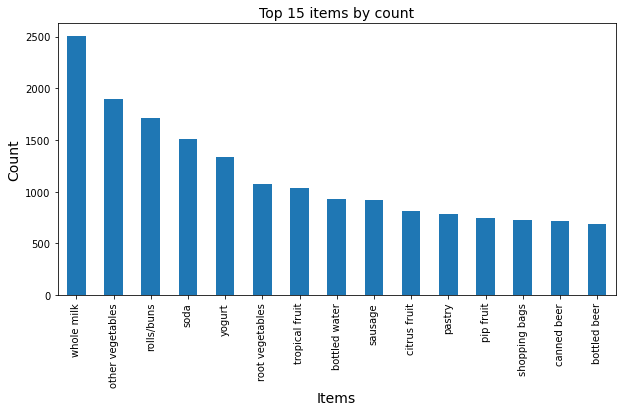

In [154]:
# Top 15 items plot by count
top_15_items = groc_st['itemDescription'].value_counts().head(15)
plt.figure(figsize=(10,5))
top_15_items.plot(kind='bar')
plt.title('Top 15 items by count',fontsize=14)
plt.xlabel('Items',fontsize=14)
plt.ylabel('Count',fontsize=14)

In [155]:
trans_list_ser = groc_st.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))
trans_list = []
for i in range(len(trans_list_ser)):
    trans_list.append(trans_list_ser.iloc[i])
trans_list[:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [186]:
# Apriori algorithm
from apyori import apriori
rules = apriori(transactions=trans_list,min_support=0.0003,min_confidence=0.05,min_lift=2,min_length=2,max_length=2)

In [187]:
result_list = list(rules)
result_list[2]

RelationRecord(items=frozenset({'whole milk', 'brandy'}), support=0.0008688097306689834, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brandy'}), items_add=frozenset({'whole milk'}), confidence=0.34210526315789475, lift=2.1662805978127717)])

In [205]:
#Function to extract the important parameters from Apriori algorithm result
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    confidence = [result[2][0][2] for result in results]
    lift = [result[2][0][3] for result in results]
    support = [result[1] for result in results]
    return list(zip(lhs,rhs,confidence,lift,support))

In [209]:
# Convert the view into a dataframe
rules_df = pd.DataFrame(inspect(result_list),columns=['Left Hand Side','Right Hand Side','Confidence','Lift','Support'])
rules_df

,Left Hand Side,Right Hand Side,Confidence,Lift,Support
0,artif. sweetener,soda,0.241379,2.485725,0.000468
1,condensed milk,berries,0.051020,2.341774,0.000334
2,brandy,whole milk,0.342105,2.166281,0.000869
3,sweet spreads,butter,0.073529,2.087705,0.000334
4,liver loaf,canned beer,0.120000,2.557778,0.000401
5,frozen fish,chocolate,0.058824,2.493418,0.000401
6,sauces,citrus fruit,0.113636,2.138794,0.000334
7,cling film/bags,curd,0.067568,2.005979,0.000334
8,condensed milk,waffles,0.051020,2.756023,0.000334
9,mustard,frankfurter,0.086957,2.302886,0.000535


In [210]:
# Look at the first 10 items by lift
rules_df.nlargest(10,columns='Lift')

,Left Hand Side,Right Hand Side,Confidence,Lift,Support
24,soups,seasonal products,0.104167,14.704206,0.000334
15,roll products,meat,0.060976,3.620548,0.000334
17,salt,misc. beverages,0.056180,3.561941,0.000334
10,liver loaf,fruit/vegetable juice,0.120000,3.527623,0.000401
11,pickled vegetables,ham,0.059701,3.489506,0.000535
26,spread cheese,sugar,0.060000,3.387849,0.000401
18,spread cheese,misc. beverages,0.050000,3.170127,0.000334
21,popcorn,pork,0.104167,2.808371,0.000334
8,condensed milk,waffles,0.051020,2.756023,0.000334
13,soft cheese,hamburger meat,0.060000,2.745505,0.000601
